importing 

Loading raw dataset...
Loading cleaned dataset...
✅ Data successfully loaded and optimized.

=== Summary Statistics ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,1.043307e+06,0.0
mean,2.390336e+02,1.671660e+02,1.142711e+02,2.344320e+02,2.268981e+02,2.816278e+01,5.453230e+01,2.093513e+00,2.773196e+00,4.692546e-01,1.535004e+02,8.554140e+00,9.941918e+02,9.287774e-04,1.517195e-03,3.516312e+01,3.241983e+01,NaN
std,3.291741e+02,2.618245e+02,1.552458e+02,3.255557e+02,3.154065e+02,5.924375e+00,2.804180e+01,1.559470e+00,1.970023e+00,2.669385e-01,1.025137e+02,6.388705e+00,2.471714e+00,3.046171e-02,3.082157e-02,1.477166e+01,1.234111e+01,NaN
min,-1.290000e+01,-7.800000e+00,-1.260000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.850000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,0.000000e+00,-1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.420000e+01,2.890000e+01,9.000000e-01,1.300000e+00,4.000000e-01,5.860000e+01,3.600000e+00,9.930000e+02,0.000000e+00,0.000000e+00,2.420000e+01,2.360000e+01,NaN
50%,1.200000e+00,0.000000e+00,9.000000e-01,3.900000e+00,3.700000e+00,2.800000e+01,5.510000e+01,1.900000e+00,2.400000e+00,5.000000e-01,1.817000e+02,8.600000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.990000e+01,2.890000e+01,NaN
75%,4.760000e+02,3.152000e+02,2.140000e+02,4.558500e+02,4.406000e+02,3.230000e+01,8.010000e+01,3.000000e+00,3.900000e+00,6.000000e-01,2.352000e+02,1.230000e+01,9.960000e+02,0.000000e+00,0.000000e+00,4.670000e+01,4.140000e+01,NaN
max,1.413000e+03,9.523000e+02,7.592000e+02,1.342300e+03,1.342300e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.200000e+00,3.600000e+02,9.940000e+01,1.003000e+03,1.000000e+00,2.500000e+00,8.100000e+01,7.250000e+01,NaN



=== Missing Values ===


GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1043307
cleaning_flag          0
dtype: int64

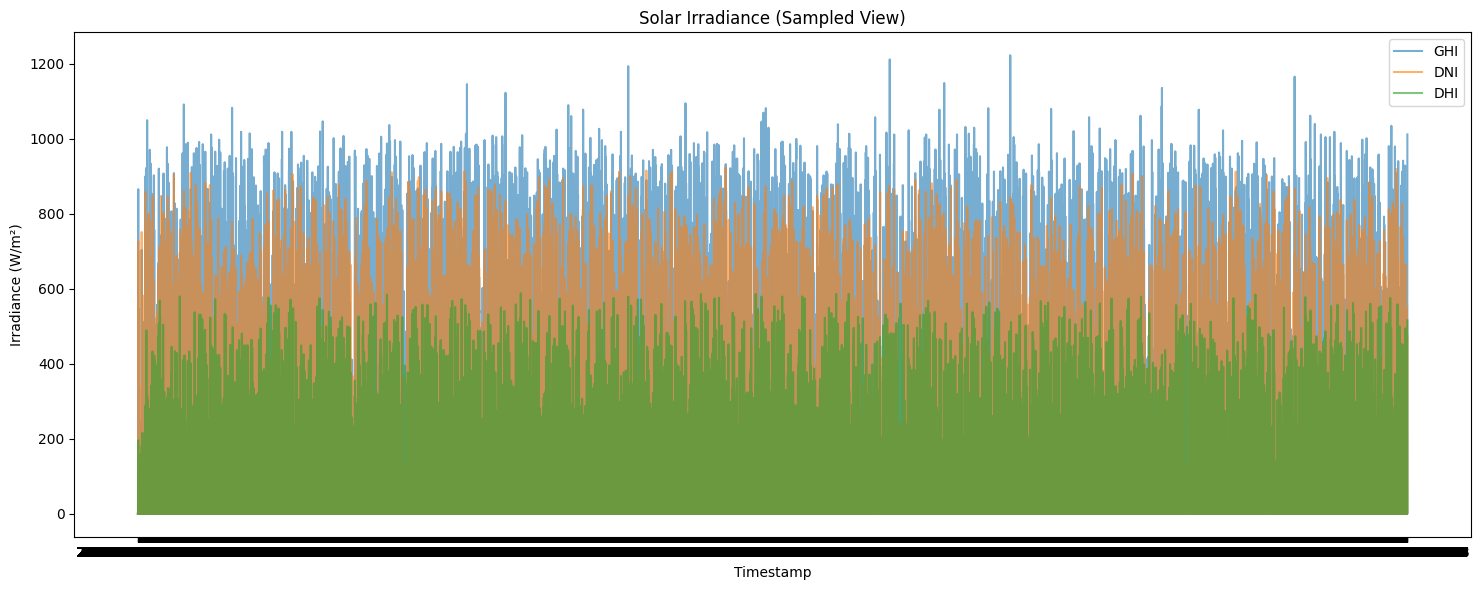

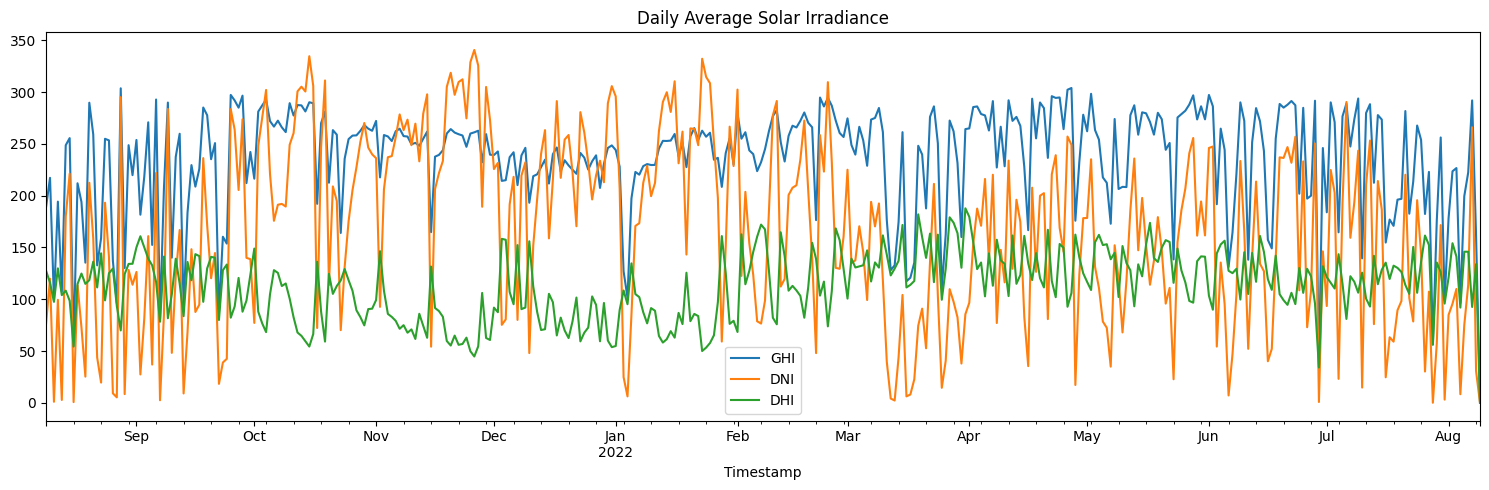

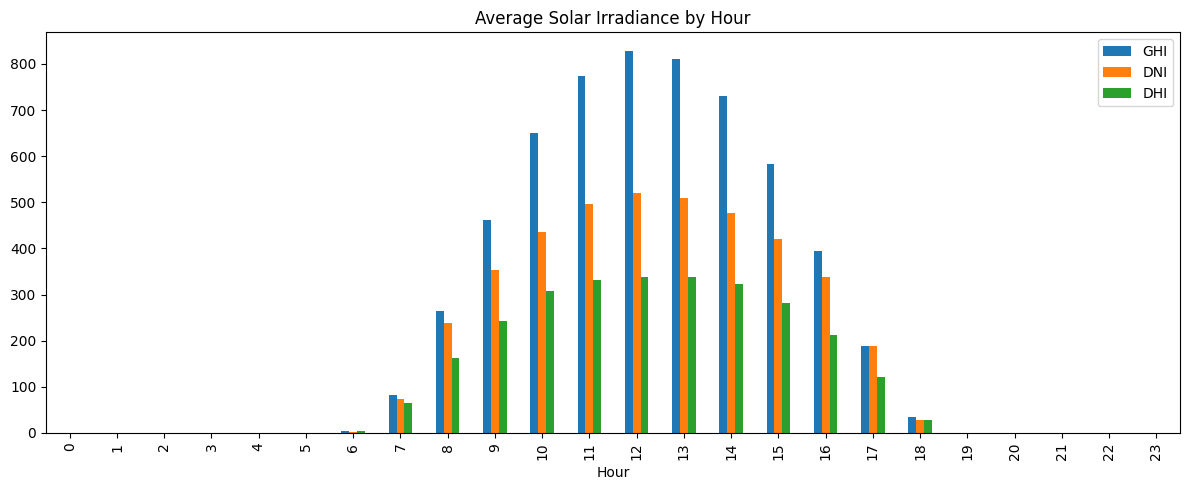

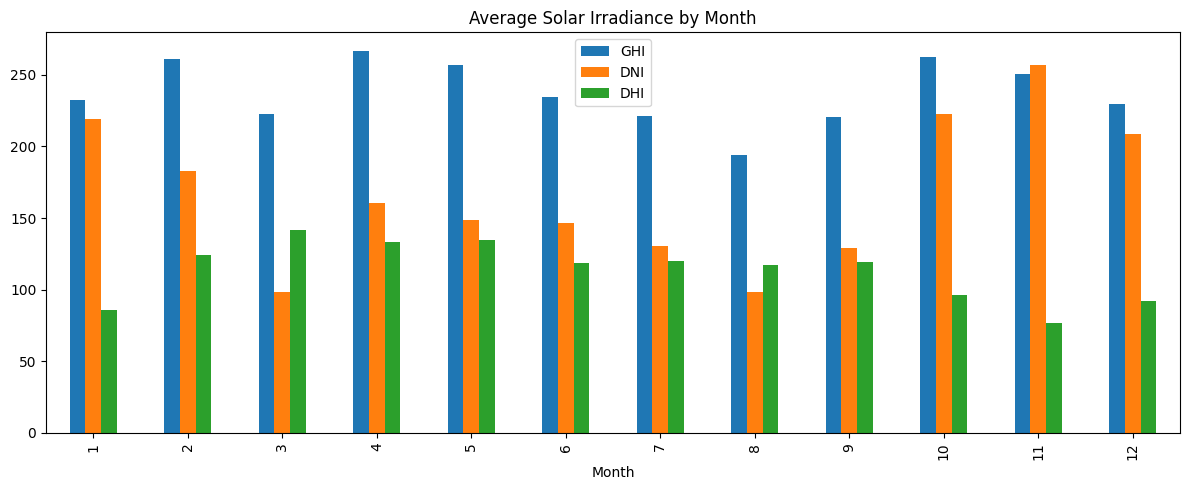

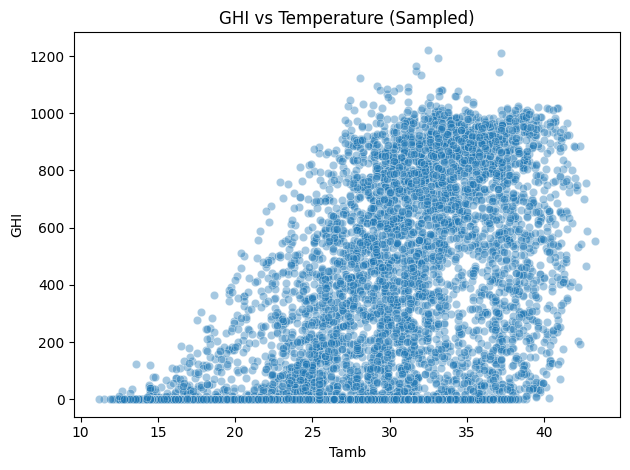

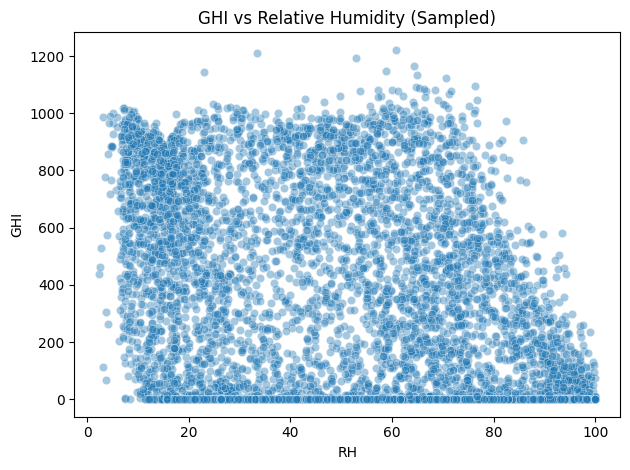

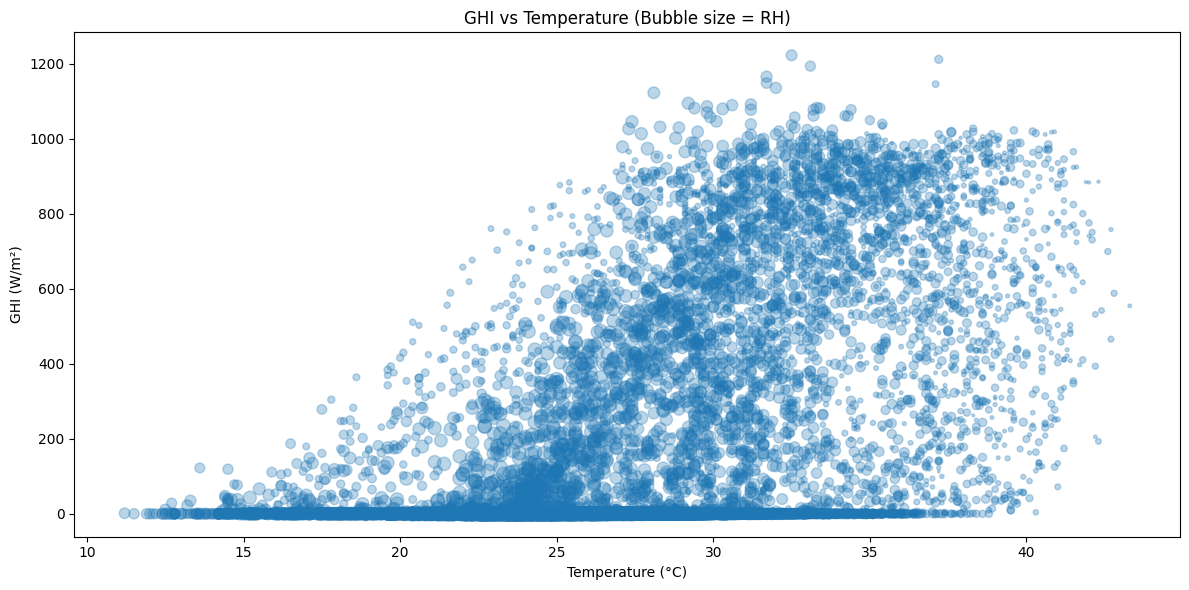

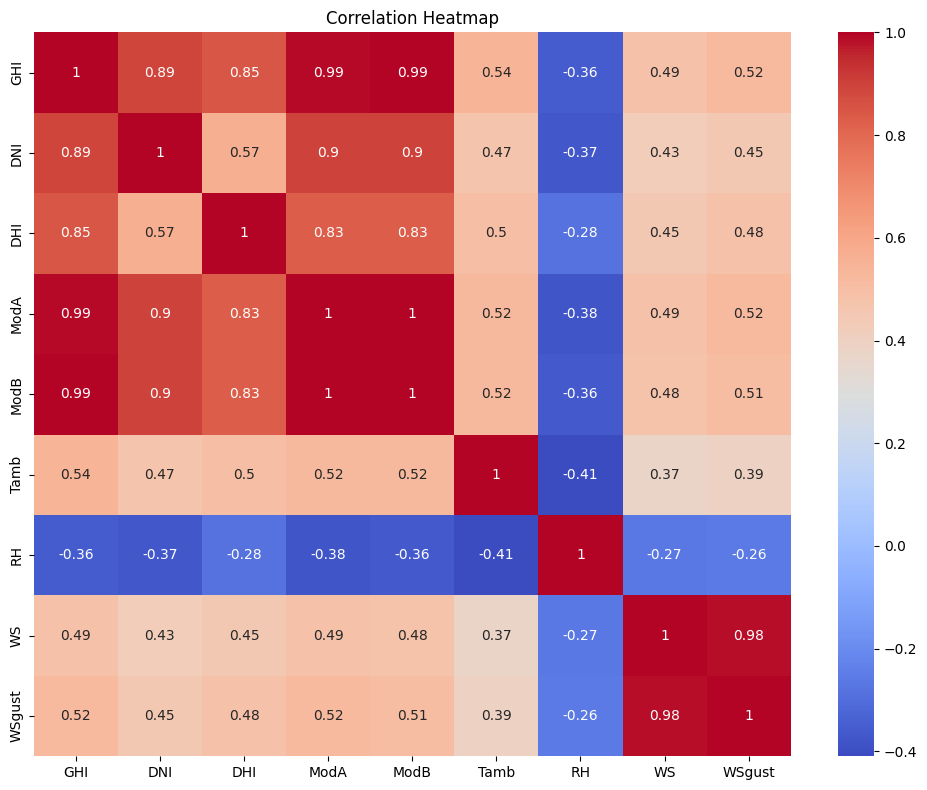

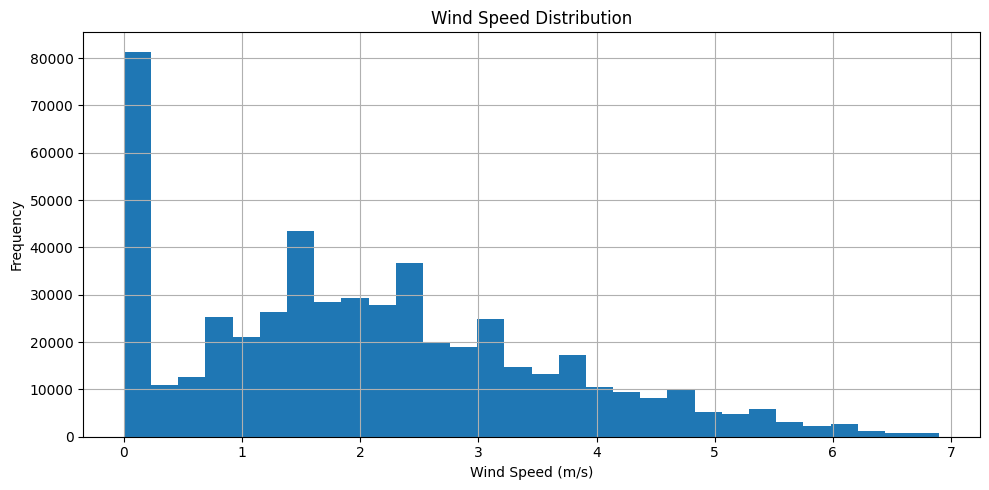

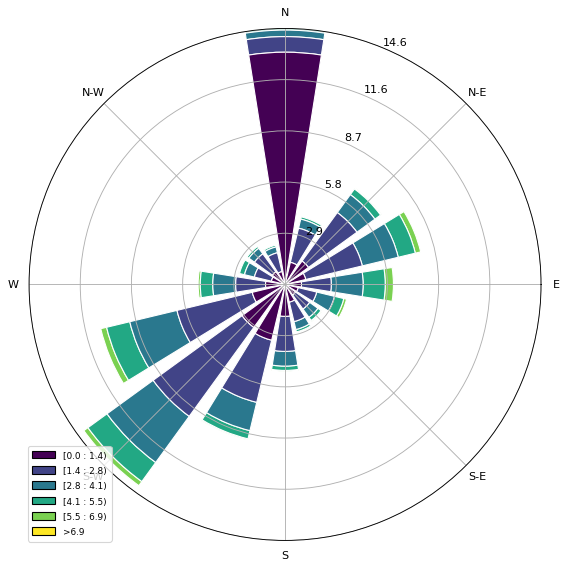


=== Average ModA & ModB Pre vs Post Cleaning ===


,ModA,ModB
cleaning_flag,,
Cleaned,232.241608,224.882355
Raw,236.589493,228.883575


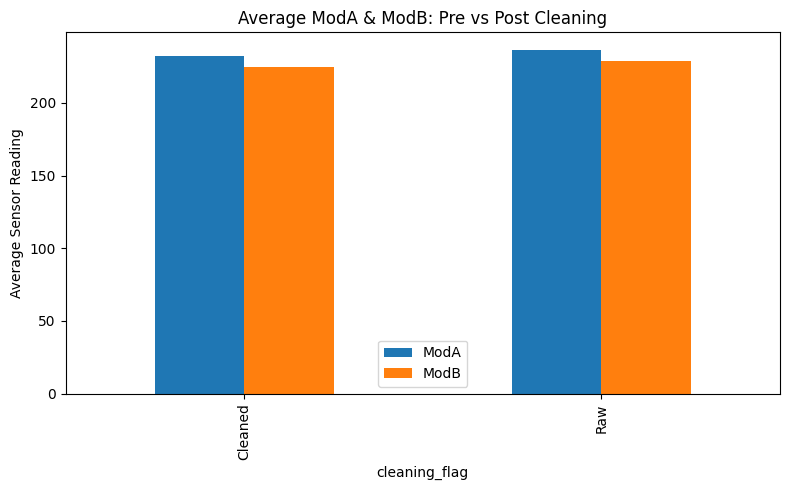

✅ EDA completed successfully with optimized performance.


In [2]:
# =========================
# Optimized Full EDA with Cleaning Impact
# =========================

# Author: Rowda Hassan
# Description: Full Exploratory Data Analysis (EDA) and Cleaning Impact Assessment
# Optimized for performance on large CSV files.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

# Plot inline (for Jupyter)
%matplotlib inline
pd.set_option('display.max_columns', None)


# ======================================================
# Step 1: Load Data Efficiently (Chunked + Optimized Types)
# ======================================================

def optimize_dtypes(df):
    """Downcast numerical columns to reduce memory usage."""
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df


# Use low_memory=False to prevent dtype guessing issues
print("Loading raw dataset...")
df_raw = pd.read_csv("../data/raw/benin-malanville.csv", low_memory=False)
print("Loading cleaned dataset...")
df_clean = pd.read_csv("../data/benin_clean.csv", low_memory=False)

# Optimize memory usage
df_raw = optimize_dtypes(df_raw)
df_clean = optimize_dtypes(df_clean)

# Add cleaning flag
df_raw["cleaning_flag"] = "Raw"
df_clean["cleaning_flag"] = "Cleaned"

# Combine for comparison
df_compare = pd.concat([df_raw, df_clean], ignore_index=True)

# Convert Timestamp
df_compare["Timestamp"] = pd.to_datetime(df_compare["Timestamp"], errors="coerce")
df_compare.dropna(subset=["Timestamp"], inplace=True)
df_compare.set_index("Timestamp", inplace=True)

print("✅ Data successfully loaded and optimized.")


# ======================================================
# Step 2: Summary Statistics & Missing Values
# ======================================================

print("\n=== Summary Statistics ===")
display(df_compare.describe())

print("\n=== Missing Values ===")
display(df_compare.isna().sum())


# ======================================================
# Step 3: Time Series Overview (Sampled for Speed)
# ======================================================

# Sample data for quick plotting (if dataset is huge)
sample_df = df_clean.sample(n=min(10000, len(df_clean)), random_state=42)

plt.figure(figsize=(15,6))
plt.plot(sample_df["Timestamp"], sample_df["GHI"], label="GHI", alpha=0.6)
plt.plot(sample_df["Timestamp"], sample_df["DNI"], label="DNI", alpha=0.6)
plt.plot(sample_df["Timestamp"], sample_df["DHI"], label="DHI", alpha=0.6)
plt.title("Solar Irradiance (Sampled View)")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.tight_layout()
plt.show()

# Daily averages
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"], errors="coerce")
df_clean.dropna(subset=["Timestamp"], inplace=True)

daily_avg = df_clean.set_index("Timestamp")[["GHI","DNI","DHI"]].resample("D").mean()
daily_avg.plot(figsize=(15,5), title="Daily Average Solar Irradiance")
plt.tight_layout()
plt.show()



# ======================================================
# Step 4: Hourly & Monthly Patterns
# ======================================================

df_clean["Hour"] = df_clean["Timestamp"].dt.hour
df_clean["Month"] = df_clean["Timestamp"].dt.month

hourly_avg = df_clean.groupby("Hour")[["GHI","DNI","DHI"]].mean()
monthly_avg = df_clean.groupby("Month")[["GHI","DNI","DHI"]].mean()

# Plot hourly average
hourly_avg.plot(kind="bar", figsize=(12,5), title="Average Solar Irradiance by Hour")
plt.tight_layout()
plt.show()

# Plot monthly average
monthly_avg.plot(kind="bar", figsize=(12,5), title="Average Solar Irradiance by Month")
plt.tight_layout()
plt.show()


# ======================================================
# Step 5: Scatter & Bubble Plots (Sampled for Speed)
# ======================================================

sns.scatterplot(x="Tamb", y="GHI", data=sample_df, alpha=0.4)
plt.title("GHI vs Temperature (Sampled)")
plt.tight_layout()
plt.show()

sns.scatterplot(x="RH", y="GHI", data=sample_df, alpha=0.4)
plt.title("GHI vs Relative Humidity (Sampled)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(sample_df["Tamb"], sample_df["GHI"], s=sample_df["RH"], alpha=0.3)
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature (Bubble size = RH)")
plt.tight_layout()
plt.show()


# ======================================================
# Step 6: Correlation Heatmap
# ======================================================

corr_features = ["GHI","DNI","DHI","ModA","ModB","Tamb","RH","WS","WSgust"]
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# ======================================================
# Step 7: Wind Analysis
# ======================================================

df_clean["WS"].hist(bins=30, figsize=(10,5))
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

ax = WindroseAxes.from_ax()
ax.bar(df_clean["WD"], df_clean["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.show()


# ======================================================
# Step 8: Cleaning Impact (Pre vs Post Cleaning)
# ======================================================

avg_mod = df_compare.groupby("cleaning_flag")[["ModA","ModB"]].mean()
print("\n=== Average ModA & ModB Pre vs Post Cleaning ===")
display(avg_mod)

avg_mod.plot(kind="bar", figsize=(8,5))
plt.title("Average ModA & ModB: Pre vs Post Cleaning")
plt.ylabel("Average Sensor Reading")
plt.tight_layout()
plt.show()

print("✅ EDA completed successfully with optimized performance.")
